In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

DATA_PATH = "../data/cleaned_df_FINALISSIMISSIMO_2006_2021.csv"

In [2]:
df = pd.read_csv(DATA_PATH, sep=";", parse_dates=True)
df.tail()

,original_song_name,original_artists_name,curr_rank,tag_fimi,publisher,date_chart,album_release_date,album_type,song_name,album_id,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
65231,una volta ancora,fred de palma feat. ana mena,96,wm italy,warner music,20.05.2021,2019-09-13,album,Una volta ancora (feat. Ana Mena),6ZWT9vaRmBayZ6wpm7c5Un,...,0.1040,0.591,124.039,audio_features,6swHvavSroD4ur3Q18MjYz,https://api.spotify.com/v1/tracks/6swHvavSroD4...,https://api.spotify.com/v1/audio-analysis/6swH...,174291.0,4.0,NaN
65232,blinding lights,the weeknd,97,island,uni,20.05.2021,2020-01-08,album,Blinding Lights (Originally Performed by the W...,6oq9QBOHeqml5Cikm1raDr,...,0.0857,0.416,170.950,audio_features,2ptKCgmQ97Ugnfbp3Ty7Pj,https://api.spotify.com/v1/tracks/2ptKCgmQ97Ug...,https://api.spotify.com/v1/audio-analysis/2ptK...,200877.0,4.0,NaN
65233,non fare così,capo plaza,98,plaza music/atlantic /wm italy,warner music,20.05.2021,2021-01-22,album,Non Fare Così,5tKxGn7nxBF5qLW6cpwVT8,...,0.0594,0.430,122.074,audio_features,769M2rTiAoL7x2lKDHLjRa,https://api.spotify.com/v1/tracks/769M2rTiAoL7...,https://api.spotify.com/v1/audio-analysis/769M...,192787.0,4.0,NaN
65234,altalene,"bloody vinyl, slait, tha supreme feat. mara sa...",99,arista,sme,20.05.2021,2020-10-02,album,ALTALENE (feat. Mara Sattei & Coez),6qAapBZqjiATXktzwBzzLC,...,0.1260,0.342,139.693,audio_features,2zqxUV6h5y6Y9WhyH0FVvX,https://api.spotify.com/v1/tracks/2zqxUV6h5y6Y...,https://api.spotify.com/v1/audio-analysis/2zqx...,186853.0,3.0,NaN
65235,smith & wesson freestyle,"guè pequeno, dj harsh & marracash",100,island,uni,20.05.2021,2021-04-08,album,Smith & Wesson Freestyle (feat. Marracash),1ay6WuRZa6LUTNN9A6JRk6,...,0.2410,0.790,92.019,audio_features,596fQREtpVHWRl3xCmVhEM,https://api.spotify.com/v1/tracks/596fQREtpVHW...,https://api.spotify.com/v1/audio-analysis/596f...,130435.0,4.0,NaN


In [3]:
df.columns

Index(['original_song_name', 'original_artists_name', 'curr_rank', 'tag_fimi',
       'publisher', 'date_chart', 'album_release_date', 'album_type',
       'song_name', 'album_id', 'artists_names', 'artists_id', 'explicit',
       'duration', 'song_id', 'popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [4]:
df["date_chart"] = pd.to_datetime(df["date_chart"], format="%d.%m.%Y")
df["album_release_date"] = pd.to_datetime(df["album_release_date"], format="%Y-%m-%d")
time_df = df.set_index("date_chart")

In [5]:
months_mean = time_df.resample("M").mean()
months_std = time_df.resample("M").std()
months_mean.tail()

,curr_rank,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,analysis_url,duration_ms,time_signature
date_chart,,,,,,,,,,,,,,,,,
2021-01-31,50.5,196129.497500,63.442500,0.668708,0.652355,5.410000,-6.532650,0.600000,0.080166,0.237875,0.032839,0.166979,0.510170,123.363927,196129.872500,3.950000,NaN
2021-02-28,50.5,198354.395000,63.642500,0.660365,0.652973,5.207500,-6.471813,0.605000,0.082923,0.249245,0.030748,0.164437,0.487196,122.190853,198354.822500,3.945000,NaN
2021-03-31,50.5,195810.627500,62.515000,0.641048,0.689182,5.445000,-5.913785,0.610000,0.083236,0.243502,0.012697,0.164255,0.496893,122.614263,195811.080000,3.937500,NaN
2021-04-30,50.5,193546.244000,64.874000,0.651046,0.691382,5.744000,-5.925716,0.588000,0.095380,0.219004,0.020682,0.168213,0.519158,121.159712,193540.732000,3.912000,NaN
2021-05-31,50.5,192464.156667,67.243333,0.664317,0.699563,5.773333,-6.079120,0.586667,0.094553,0.215962,0.013712,0.180676,0.540910,119.180750,192464.593333,3.896667,NaN


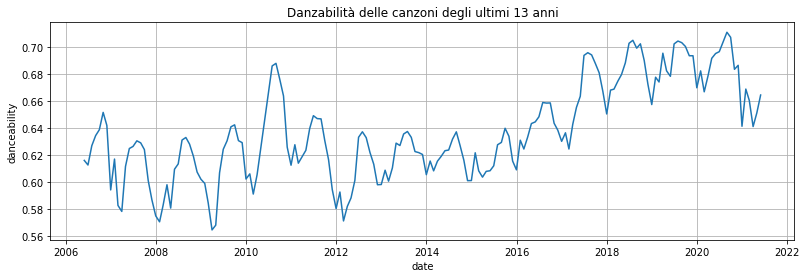

In [6]:
fig, ax = plt.subplots(figsize=plt.figaspect(0.3))

sns.lineplot(x=months_mean.index, y="danceability", data=months_mean, ax=ax)

#ax.set_ylim(0.4, 0.6)
ax.set(xlabel="date", title="Danzabilità delle canzoni degli ultimi 13 anni")
ax.grid()
plt.savefig("/home/giuseppe/Desktop/danceability.png")

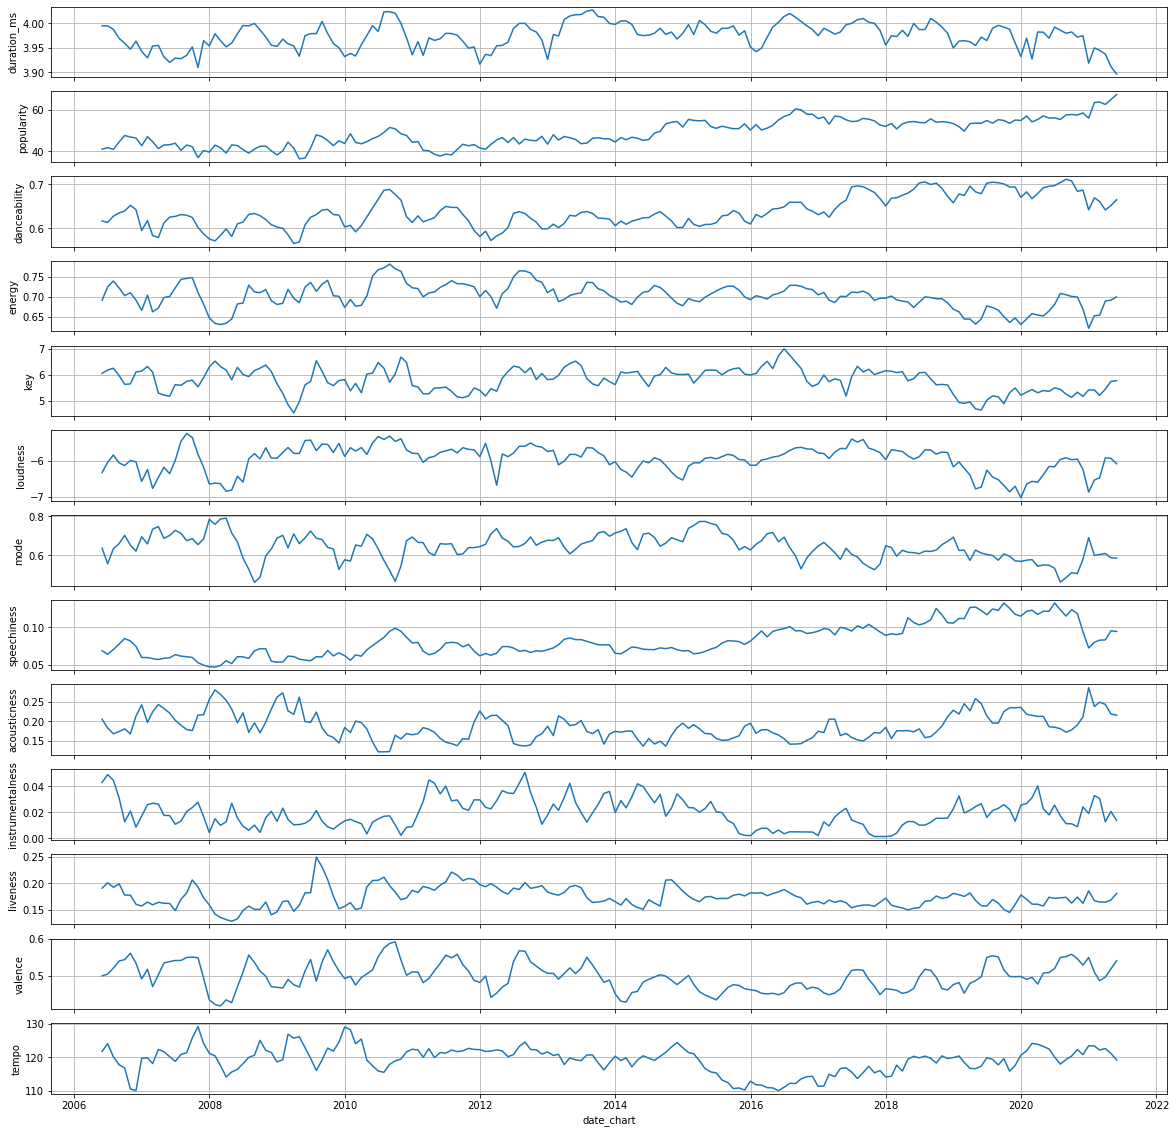

In [46]:
feat_to_plot = ['duration_ms', 'popularity', 'danceability', 
                'energy', 'key', 'loudness', 
                'mode', 'speechiness', 'acousticness', 
                'instrumentalness', 'liveness', 
                'valence', 'tempo']

fig, axs = plt.subplots(len(feat_to_plot),1, sharex=True, figsize=(20,20))
for ax, feat in zip(axs, feat_to_plot):
    sns.lineplot(x=months_mean.index, y=feat, data=months_mean, ax=ax)
    ax.grid()


plt.savefig("/home/giuseppe/Desktop/spot_feats.png", dpi=300)

In [15]:
diff_date = df["album_release_date"] - df["date_chart"]

In [30]:
dc_over = df[diff_date.dt.days > 0]["date_chart"]

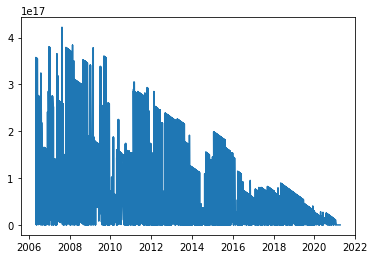

In [31]:
plt.plot(dc_over, diff_date[diff_date.dt.days > 0])

In [24]:
diff_date[diff_date.dt.days > 0]

2        204 days
8        970 days
16       239 days
20      4135 days
21      3568 days
           ...   
63338      8 days
63425    127 days
63440      1 days
63441      1 days
64551      1 days
Length: 7558, dtype: timedelta64[ns]